In [143]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
from utils import *
from filters import *

In [144]:
m = 66
q = np.ceil(0.1*m)-1
r = m -10*q
BL = 10+3*q + 11*r
BH = BL + 40

print(m,q,r,BL,BH)

66 6.0 6.0 94.0 134.0


In [145]:
delta1 = 0.15
delta2 = 0.15
fp1,fp2,fs1,fs2,f_samp = (BL-5)*1000,(BH+5)*1000,BL*1000,BH*1000,425000

[wp1,wp2,ws1,ws2] = normalize(f_samp,[fp1,fp2,fs1,fs2])

[Op1,Op2,Os1,Os2] = to_analog([wp1,wp2,ws1,ws2])

[OLp1,OLp2,OLs1,OLs2],B,Omega_o,sb_tr_fn = sb_to_lp(Op1,Op2,Os1,Os2)

In [146]:
print([fp1,fp2,fs1,fs2])
print([wp1,wp2,ws1,ws2])
print([Op1,Op2,Os1,Os2])
print([OLp1,OLp2,OLs1,OLs2])


[89000.0, 139000.0, 94000.0, 134000.0]
[1.3157729231505486, 2.0549711945834415, 1.3896927502938379, 1.981051367440152]
[0.7727238491623624, 1.6557965946163646, 0.8335165175013705, 1.5254242470965713]
[0.9999999999999998, -1.0000000000000004, 1.2588093792965538, -1.2860434544694093]


In [147]:
omega_p,omega_s = max(abs(OLp1),abs(OLp2)),min(abs(OLs1),abs(OLs2))
cheby_lp,N,eps,poles = Chebyshev(delta1,delta2,omega_p,omega_s)

In [148]:
omega_p,omega_s

(1.0000000000000004, 1.2588093792965538)

In [149]:
ang_freq = np.linspace(0,1.5*omega_s,1401)
response = np.vectorize(cheby_lp)(ang_freq*(1j))

mag_resp = np.absolute(response)
phase = np.angle(response)

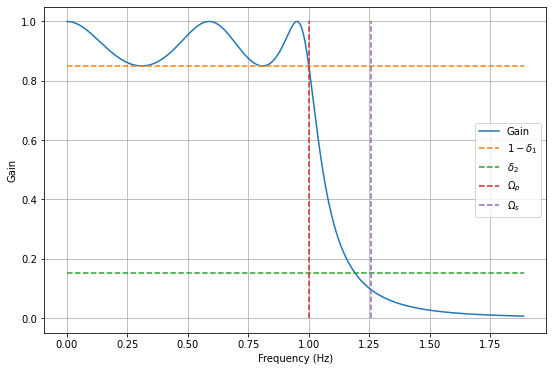

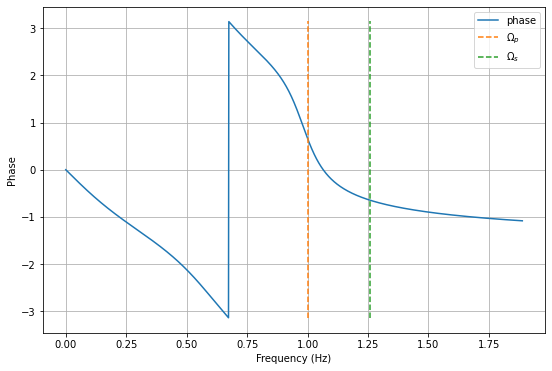

In [150]:
plt.plot(ang_freq,mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$1-\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([omega_p,omega_p], [0,1],'--', label='$\Omega_p$')
plt.plot([omega_s,omega_s], [0,1],'--', label='$\Omega_s$')
# plt.plot([omega_c,omega_c], [0,1],'--', label='$\Omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_sL.pdf')

plt.show()

plt.plot(ang_freq,phase,label="phase")
plt.plot([omega_p,omega_p], [-pi,pi],'--', label='$\Omega_p$')
plt.plot([omega_s,omega_s], [-pi,pi],'--', label='$\Omega_s$')
# plt.plot([omega_c,omega_c], [-pi,pi],'--', label='$\Omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_sL.pdf')
plt.show()

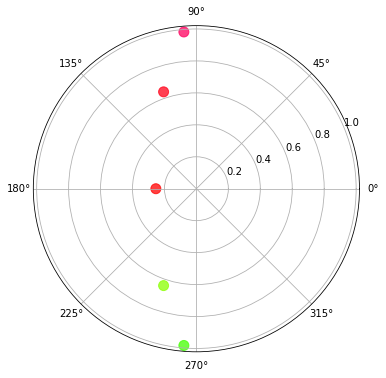

In [151]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles), np.abs(poles), c=np.angle(poles), s=100, cmap='hsv', alpha=0.75)
plt.savefig('Poles_sL.pdf')


In [152]:
N,eps

(5, 0.6197443384031024)

In [153]:
sl = symbols('sl') # creating the symbolic sL
Tr_fn_lp = cheby_lp(sl) # passing symbol to lp transfer function 
simplify(expand(Tr_fn_lp))

(0.100848037048703 + 1.23165366794353e-16*I)/(1.0*sl**5 + sl**4*(0.821578525422317 + 7.7715611723761e-16*I) + sl**3*(1.58749563671756 + 7.21644966006352e-16*I) + sl**2*(0.8288087323106 + 8.88178419700125e-16*I) + sl*(0.514610257850246 + 4.09394740330526e-16*I) + 0.100848037048703 + 1.21430643318376e-16*I)

In [154]:
Tr_fn_lp_print = round_expr(Tr_fn_lp,3) # for printing purposes, we round coefficients
print(latex(Tr_fn_lp_print))
print("===================================")
print(latex(round_expr(expand(Tr_fn_lp,sl),3)))

\frac{0.101}{\left(sl + 0.254\right) \left(sl + 0.078 - 0.981 i\right) \left(sl + 0.078 + 0.981 i\right) \left(sl + 0.205 - 0.606 i\right) \left(sl + 0.205 + 0.606 i\right)}
\frac{0.101}{sl^{5} + 0.822 sl^{4} + 1.587 sl^{3} + 0.829 sl^{2} + 0.515 sl + 0.101}


In [155]:
s = symbols('s')
freq_trfn = sb_tr_fn(s) # S-transformation we obtained from sb_to_lp
Tr_fn_sb = Tr_fn_lp.subs(sl,freq_trfn) # substituting the frequency transform here
print(latex(round_expr(expand(simplify(Tr_fn_sb)),3)))

\frac{0.101 s^{10}}{0.101 s^{10} + 0.454 s^{9} + 1.291 s^{8} + 3.419 s^{7} + 4.631 s^{6} + 7.798 s^{5} + 5.926 s^{4} + 5.597 s^{3} + 2.705 s^{2} + 1.218 s + 0.346} + \frac{0.645 s^{8}}{0.101 s^{10} + 0.454 s^{9} + 1.291 s^{8} + 3.419 s^{7} + 4.631 s^{6} + 7.798 s^{5} + 5.926 s^{4} + 5.597 s^{3} + 2.705 s^{2} + 1.218 s + 0.346} + \frac{1.651 s^{6}}{0.101 s^{10} + 0.454 s^{9} + 1.291 s^{8} + 3.419 s^{7} + 4.631 s^{6} + 7.798 s^{5} + 5.926 s^{4} + 5.597 s^{3} + 2.705 s^{2} + 1.218 s + 0.346} + \frac{2.112 s^{4}}{0.101 s^{10} + 0.454 s^{9} + 1.291 s^{8} + 3.419 s^{7} + 4.631 s^{6} + 7.798 s^{5} + 5.926 s^{4} + 5.597 s^{3} + 2.705 s^{2} + 1.218 s + 0.346} + \frac{1.351 s^{2}}{0.101 s^{10} + 0.454 s^{9} + 1.291 s^{8} + 3.419 s^{7} + 4.631 s^{6} + 7.798 s^{5} + 5.926 s^{4} + 5.597 s^{3} + 2.705 s^{2} + 1.218 s + 0.346} + \frac{0.346}{0.101 s^{10} + 0.454 s^{9} + 1.291 s^{8} + 3.419 s^{7} + 4.631 s^{6} + 7.798 s^{5} + 5.926 s^{4} + 5.597 s^{3} + 2.705 s^{2} + 1.218 s + 0.346}


In [156]:
freq_trfn

0.883072745454002*s/(s**2 + 1.27947351802189)

In [157]:
B,Omega_o

(0.8830727454540023, 1.131138151607437)

In [158]:
print(latex(round_expr(expand(Tr_fn_sb,s),3)))

\frac{0.101}{\frac{0.2 s^{5}}{0.373 s^{10} + 2.387 s^{8} + 6.109 s^{6} + 7.816 s^{4} + 5.0 s^{2} + 1.279} + \frac{0.111 s^{4}}{0.373 s^{8} + 1.91 s^{6} + 3.665 s^{4} + 3.126 s^{2} + 1} - \frac{0.223 i s^{4}}{0.373 s^{8} + 1.91 s^{6} + 3.665 s^{4} + 3.126 s^{2} + 1} + \frac{0.031 s^{4}}{0.153 s^{8} + 0.782 s^{6} + 1.5 s^{4} + 1.279 s^{2} + 0.409} + \frac{0.091 i s^{4}}{0.153 s^{8} + 0.782 s^{6} + 1.5 s^{4} + 1.279 s^{2} + 0.409} + \frac{0.668 s^{3}}{0.611 s^{6} + 2.345 s^{4} + 3.0 s^{2} + 1.279} + \frac{0.395 s^{2}}{0.611 s^{4} + 1.563 s^{2} + 1} + \frac{0.454 s}{s^{2} + 1.279} + 0.101}


In [159]:

cheby_sb = lambdify(s, Tr_fn_sb,'numpy') # returns a numpy-ready function

ang_freq = np.linspace(0,2,1401)

sb_response = cheby_sb(ang_freq*(1j))
sb_mag_resp = np.absolute(sb_response)
sb_phase = np.angle(sb_response)

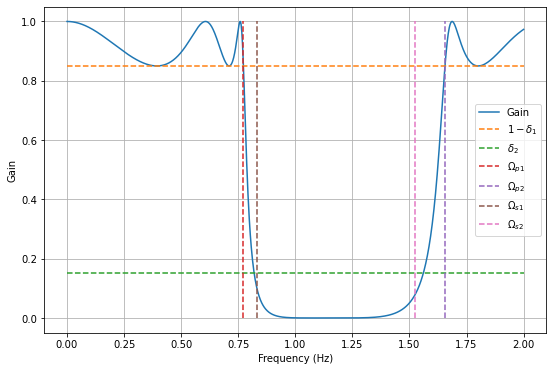

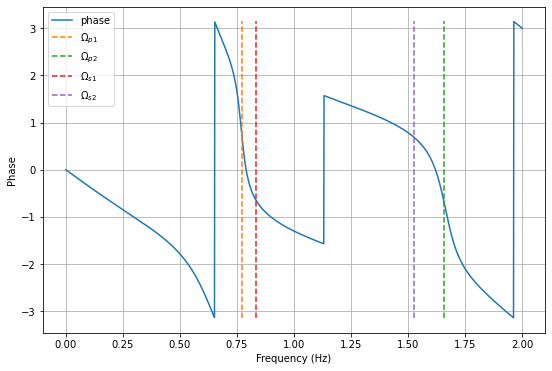

In [160]:
plt.plot(ang_freq,sb_mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$1-\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([Op1,Op1], [0,1],'--', label='$\Omega_{p1}$')
plt.plot([Op2,Op2], [0,1],'--', label='$\Omega_{p2}$')
plt.plot([Os1,Os1], [0,1],'--', label='$\Omega_{s1}$')
plt.plot([Os2,Os2], [0,1],'--', label='$\Omega_{s2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_s.pdf')

plt.show()

plt.plot(ang_freq,sb_phase,label="phase")
plt.plot([Op1,Op1], [-pi,pi],'--', label='$\Omega_{p1}$')
plt.plot([Op2,Op2], [-pi,pi],'--', label='$\Omega_{p2}$')
plt.plot([Os1,Os1], [-pi,pi],'--', label='$\Omega_{s1}$')
plt.plot([Os2,Os2], [-pi,pi],'--', label='$\Omega_{s2}$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_s.pdf')
plt.show()

In [161]:
poles_sb = solve(1/Tr_fn_sb) # Finding Poles of System in Bandpass domain
poles_sb = np.fromiter(poles_bp,dtype=complex)

In [162]:
poles_sb

array([-3.06017998+3.00746940e-15j, -0.41810401-4.10902306e-16j,
       -0.33304534-1.94531498e+00j, -0.33304534+1.94531498e+00j,
       -0.10939773-6.38991181e-01j, -0.10939773+6.38991181e-01j,
       -0.04889655-1.66297393e+00j, -0.04889655+1.66297393e+00j,
       -0.02260286+7.68724206e-01j, -0.02260286-7.68724206e-01j])

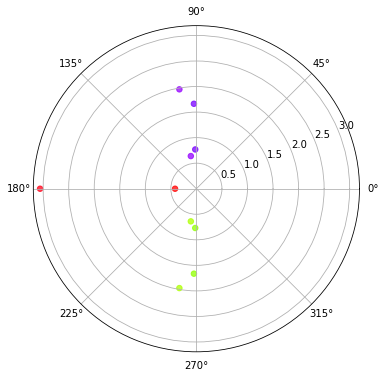

In [163]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles_sb), np.abs(poles_sb), c=np.angle(poles_sb), s=30, cmap='hsv', alpha=0.75)
plt.savefig('Poles_s.pdf')


In [164]:
z = symbols('z') # Symbol for Z-domain
bilenear_trans = (z-1)/(z+1) # to transform s to z

bilenear_trans

(z - 1)/(z + 1)

In [165]:
tr_fn_z = Tr_fn_sb.subs(s,bilenear_trans) # Substitute s by bilinear transform
tr_fn_z

(0.100848037048703 + 1.23165366794353e-16*I)/((0.883072745454002*(z - 1)/((z + 1)*((z - 1)**2/(z + 1)**2 + 1.27947351802189)) + 0.0784537680710762 + 0.981228533293129*I)*(0.883072745454002*(z - 1)/((z + 1)*((z - 1)**2/(z + 1)**2 + 1.27947351802189)) + 0.0784537680710764 - 0.981228533293128*I)*(0.883072745454002*(z - 1)/((z + 1)*((z - 1)**2/(z + 1)**2 + 1.27947351802189)) + 0.205394631355579 + 0.606432584306361*I)*(0.883072745454002*(z - 1)/((z + 1)*((z - 1)**2/(z + 1)**2 + 1.27947351802189)) + 0.205394631355579 - 0.606432584306361*I)*(0.883072745454002*(z - 1)/((z + 1)*((z - 1)**2/(z + 1)**2 + 1.27947351802189)) + 0.253881726569006 + 1.89524759350351e-16*I))

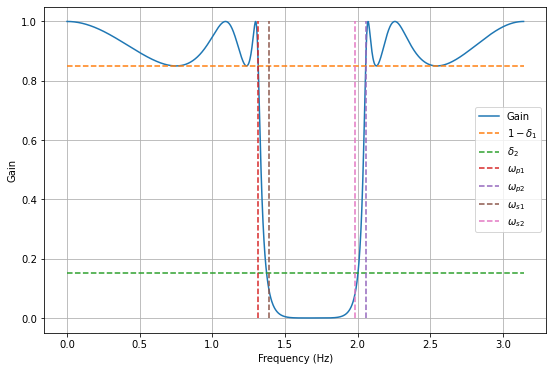

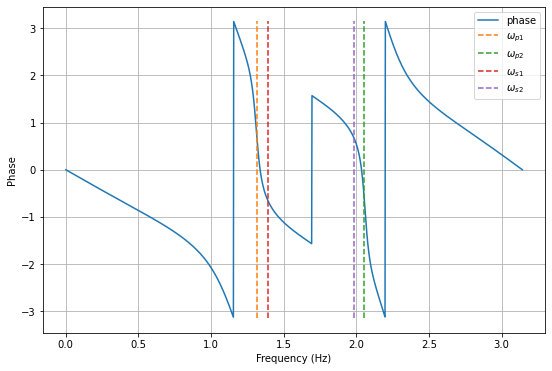

In [166]:

butter_z = lambdify(z, tr_fn_z,'numpy') # returns a numpy-ready function

ang_freq = np.linspace(0,np.pi,1401)

z_response = butter_z(np.exp(ang_freq*(1j)))
z_mag_resp = np.absolute(z_response)
z_phase = np.angle(z_response)

plt.plot(ang_freq,z_mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$1-\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([wp1,wp1], [0,1],'--', label='$\omega_{p1}$')
plt.plot([wp2,wp2], [0,1],'--', label='$\omega_{p2}$')
plt.plot([ws1,ws1], [0,1],'--', label='$\omega_{s1}$')
plt.plot([ws2,ws2], [0,1],'--', label='$\omega_{s2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_z.pdf')

plt.show()

plt.plot(ang_freq,z_phase,label="phase")
plt.plot([wp1,wp1], [-pi,pi],'--', label='$\omega_{p1}$')
plt.plot([wp2,wp2], [-pi,pi],'--', label='$\omega_{p2}$')
plt.plot([ws1,ws1], [-pi,pi],'--', label='$\omega_{s1}$')
plt.plot([ws2,ws2], [-pi,pi],'--', label='$\omega_{s2}$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_z.pdf')
plt.show()


In [167]:
poles_Z = solve(1/tr_fn_z) # Solve for poles of the system
poles_Z = np.fromiter(poles_Z,dtype=complex)
Zeros_Z = solve(tr_fn_z) # Solve for Zeros of the system
Zeros_Z = np.fromiter(Zeros_Z,dtype=complex)

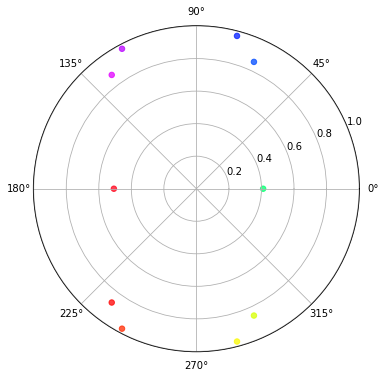

In [168]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles_Z), np.abs(poles_Z), c=np.angle(poles_Z), s=30, cmap='hsv', alpha=0.75)
c = ax.scatter(np.angle(Zeros_Z), np.abs(Zeros_Z), c=np.angle(Zeros_Z), s=50, cmap='hsv', alpha=1)
plt.savefig('Poles_Zeros_Z.pdf')

In [169]:
print(latex(round_expr(expand(simplify(tr_fn_z)),3)))

\frac{6.206 z^{10}}{33.487 z^{10} + 28.34 z^{9} + 73.593 z^{8} + 49.568 z^{7} + 80.952 z^{6} + 37.679 z^{5} + 36.964 z^{4} + 11.128 z^{3} + 7.173 z^{2} - 1.3 z - 3.486} + \frac{7.609 z^{9}}{33.487 z^{10} + 28.34 z^{9} + 73.593 z^{8} + 49.568 z^{7} + 80.952 z^{6} + 37.679 z^{5} + 36.964 z^{4} + 11.128 z^{3} + 7.173 z^{2} - 1.3 z - 3.486} + \frac{34.764 z^{8}}{33.487 z^{10} + 28.34 z^{9} + 73.593 z^{8} + 49.568 z^{7} + 80.952 z^{6} + 37.679 z^{5} + 36.964 z^{4} + 11.128 z^{3} + 7.173 z^{2} - 1.3 z - 3.486} + \frac{31.352 z^{7}}{33.487 z^{10} + 28.34 z^{9} + 73.593 z^{8} + 49.568 z^{7} + 80.952 z^{6} + 37.679 z^{5} + 36.964 z^{4} + 11.128 z^{3} + 7.173 z^{2} - 1.3 z - 3.486} + \frac{73.372 z^{6}}{33.487 z^{10} + 28.34 z^{9} + 73.593 z^{8} + 49.568 z^{7} + 80.952 z^{6} + 37.679 z^{5} + 36.964 z^{4} + 11.128 z^{3} + 7.173 z^{2} - 1.3 z - 3.486} + \frac{47.492 z^{5}}{33.487 z^{10} + 28.34 z^{9} + 73.593 z^{8} + 49.568 z^{7} + 80.952 z^{6} + 37.679 z^{5} + 36.964 z^{4} + 11.128 z^{3} + 7.173 

In [170]:
print(latex(round_expr(factor(tr_fn_z),3)))

\frac{73.372 \cdot \left(0.085 z^{10} + 0.104 z^{9} + 0.474 z^{8} + 0.427 z^{7} + 1.0 z^{6} + 0.647 z^{5} + 1.0 z^{4} + 0.427 z^{3} + 0.474 z^{2} + 0.104 z + 0.085\right)}{\left(1.462 z^{2} + 0.142 z - 0.304\right) \left(z^{2} \cdot \left(1.062 - 2.237 i\right) + z \left(0.044 - 0.548 i\right) - 0.704 - 2.237 i\right) \left(z^{2} \cdot \left(1.062 + 2.237 i\right) + z \left(0.044 + 0.548 i\right) - 0.704 + 2.237 i\right) \left(z^{2} \cdot \left(1.351 - 1.382 i\right) + z \left(0.115 - 0.339 i\right) - 0.415 - 1.382 i\right) \left(z^{2} \cdot \left(1.351 + 1.382 i\right) + z \left(0.115 + 0.339 i\right) - 0.415 + 1.382 i\right)}


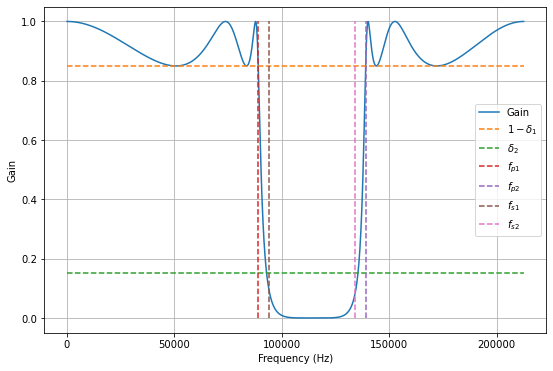

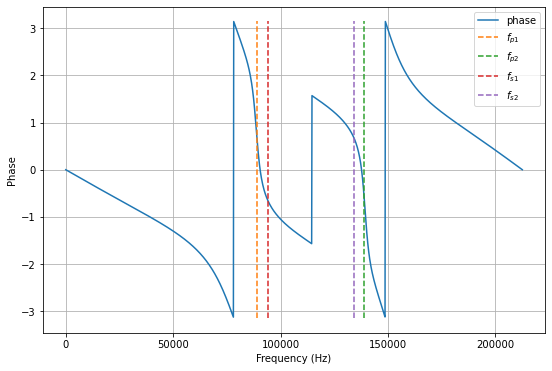

In [171]:

freq = np.linspace(0,f_samp/2,1401)

f_response = butter_z(np.exp(normalize(f_samp,freq*(1j))))
f_mag_resp = np.absolute(f_response)
f_phase = np.angle(f_response)

plt.plot(freq,f_mag_resp,label="Gain")
plt.plot([freq[0],freq[-1]], [1-delta1,1-delta1],'--', label='$1-\delta_1$')
plt.plot([freq[0],freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([fp1,fp1], [0,1],'--', label='$f_{p1}$')
plt.plot([fp2,fp2], [0,1],'--', label='$f_{p2}$')
plt.plot([fs1,fs1], [0,1],'--', label='$f_{s1}$')
plt.plot([fs2,fs2], [0,1],'--', label='$f_{s2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain.pdf')

plt.show()

plt.plot(freq,z_phase,label="phase")
plt.plot([fp1,fp1], [-pi,pi],'--', label='$f_{p1}$')
plt.plot([fp2,fp2], [-pi,pi],'--', label='$f_{p2}$')
plt.plot([fs1,fs1], [-pi,pi],'--', label='$f_{s1}$')
plt.plot([fs2,fs2], [-pi,pi],'--', label='$f_{s2}$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase.pdf')
plt.show()
